# Spirals Classification

Classify two spirals generated with the library SyntheticDatasets, using NNJulia.

### Imports

In [1]:
# Import external librairies to generate dataset and plot
using SyntheticDatasets
using Plots

# Import NNJulia
include("../src/NNJulia.jl")
using .NNJulia

### Load dataset

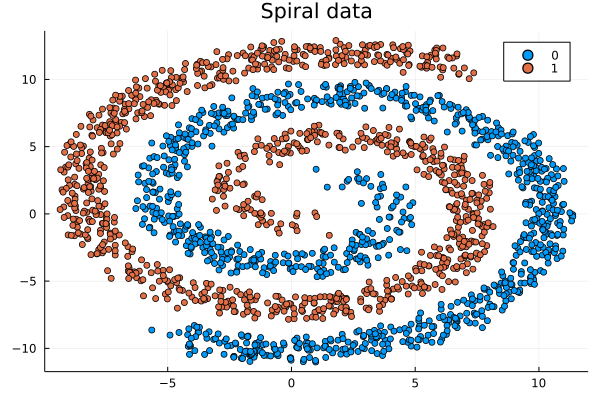

In [4]:
# load dataset
spirals = SyntheticDatasets.make_twospirals(n_samples = 2000, 
                                            start_degrees = 90,
                                            total_degrees = 570, 
                                            noise =1.9);


# plot dataset
scatter(spirals.feature_1,spirals.feature_2,group=spirals.label,title="Spiral data")

In [5]:
# extract inputs and labels from the dataset
xData = permutedims([spirals.feature_1 spirals.feature_2]) # 2x2000
yData = permutedims(spirals.label) #1x2000

# split the dataset into train and test sets
x_train,y_train,x_test,y_test = split_train_test(xData,yData,0.9);

### Create the model 

In [6]:
model = Sequential(
        Dense(2, 16, leakyrelu),
        Dense(16, 16, leakyrelu),
        Dense(16, 1, sigmoid),
    )

Sequential with : 3 layer


Dense: 2 --> 16, Activation = leakyrelu
Dense: 16 --> 16, Activation = leakyrelu
Dense: 16 --> 1, Activation = sigmoid


### Train the model

Initialise the parameters used for the training phase :

In [7]:
# Initialise the optimiser, the loss function and the metrics used to compute accuracy
opt = GradientDescent(0.01)
loss = BinaryCrossentropy()
metrics = BinaryAccuracy(0.8)

# Pass it to the TrainParameters struct that will be used during training
trainParams = TrainParameters(opt, loss, metrics)

# Training specifications
batchsize = 64
nbEpochs = 600;

Load the train data into a dataloader that will split the data into shuffled batches :

In [8]:
trainData = DataLoader(x_train, y_train, batchsize,true);

Train the model :

In [9]:
history = train!(model, trainParams, trainData, nbEpochs)

Epoch 1 : accuracy = 0.5738146551724138, loss = 29.23093526104041
Epoch 2 : accuracy = 0.5727370689655172, loss = 21.213217106488273
Epoch 3 : accuracy = 0.5792025862068966, loss = 21.41831120984573
Epoch 4 : accuracy = 0.5700431034482759, loss = 21.145040873055542
Epoch 5 : accuracy = 0.5829741379310345, loss = 19.5836937000545
Epoch 6 : accuracy = 0.5522629310344828, loss = 21.303915745520243
Epoch 7 : accuracy = 0.5921336206896551, loss = 18.880637603912938
Epoch 8 : accuracy = 0.5770474137931034, loss = 20.120552459471316
Epoch 9 : accuracy = 0.5942887931034483, loss = 19.34252036097116
Epoch 10 : accuracy = 0.5851293103448276, loss = 18.90968478560462
Epoch 11 : accuracy = 0.5759698275862069, loss = 19.34931849441171
Epoch 12 : accuracy = 0.5883620689655172, loss = 18.83411109478063
Epoch 13 : accuracy = 0.609375, loss = 18.891302316357258
Epoch 14 : accuracy = 0.5959051724137931, loss = 18.96236277584491
Epoch 15 : accuracy = 0.6045258620689655, loss = 18.744232874521142
Epoch 16

Epoch 17 : accuracy = 0.5932112068965517, loss = 18.177427973230728
Epoch 18 : accuracy = 0.6174568965517241, loss = 18.311449269892304
Epoch 19 : accuracy = 0.630926724137931, loss = 18.32806898994186
Epoch 20 : accuracy = 0.6072198275862069, loss = 18.55898438494869
Epoch 21 : accuracy = 0.6061422413793104, loss = 18.46726475694984
Epoch 22 : accuracy = 0.6179956896551724, loss = 18.29718391813018
Epoch 23 : accuracy = 0.6212284482758621, loss = 17.921353613503506
Epoch 24 : accuracy = 0.6056034482758621, loss = 18.4694632670719
Epoch 25 : accuracy = 0.6298491379310345, loss = 18.198405653279558
Epoch 26 : accuracy = 0.6179956896551724, loss = 18.509725221508642
Epoch 27 : accuracy = 0.6271551724137931, loss = 17.851111680439452
Epoch 28 : accuracy = 0.6217672413793104, loss = 17.581711274311882
Epoch 29 : accuracy = 0.6266163793103449, loss = 17.894655816165812
Epoch 30 : accuracy = 0.6206896551724138, loss = 17.672947533513586


Epoch 31 : accuracy = 0.6255387931034483, loss = 18.04656308179544
Epoch 32 : accuracy = 0.6352370689655172, loss = 17.65145042586618
Epoch 33 : accuracy = 0.6400862068965517, loss = 17.836266072284996
Epoch 34 : accuracy = 0.6282327586206896, loss = 17.828136909323163
Epoch 35 : accuracy = 0.6179956896551724, loss = 17.49246736929369
Epoch 36 : accuracy = 0.6427801724137931, loss = 17.65799551984635
Epoch 37 : accuracy = 0.6325431034482759, loss = 17.83121285339995
Epoch 38 : accuracy = 0.6201508620689655, loss = 18.211601435713792
Epoch 39 : accuracy = 0.6476293103448276, loss = 16.974548420710942
Epoch 40 : accuracy = 0.6217672413793104, loss = 17.846546564053327
Epoch 41 : accuracy = 0.6260775862068966, loss = 18.144184748563067
Epoch 42 : accuracy = 0.6384698275862069, loss = 17.11473833837622
Epoch 43 : accuracy = 0.6379310344827587, loss = 17.92667865580701
Epoch 44 : accuracy = 0.6481681034482759, loss = 17.31070986041616
Epoch 45 : accuracy = 0.6255387931034483, loss = 17.8688

Epoch 48 : accuracy = 0.6395474137931034, loss = 17.357316652497925
Epoch 49 : accuracy = 0.6363146551724138, loss = 16.998856222121905
Epoch 50 : accuracy = 0.640625, loss = 17.37922201157108
Epoch 51 : accuracy = 0.630926724137931, loss = 17.47280547846978
Epoch 52 : accuracy = 0.6427801724137931, loss = 17.296847992607685
Epoch 53 : accuracy = 0.6390086206896551, loss = 17.143283127640892
Epoch 54 : accuracy = 0.6276939655172413, loss = 17.560630609051042
Epoch 55 : accuracy = 0.6417025862068966, loss = 17.111292909580683
Epoch 56 : accuracy = 0.630926724137931, loss = 17.338764270393145
Epoch 57 : accuracy = 0.6481681034482759, loss = 17.103527475808733
Epoch 58 : accuracy = 0.6589439655172413, loss = 16.632898985186884
Epoch 59 : accuracy = 0.6325431034482759, loss = 17.03801682819338
Epoch 60 : accuracy = 0.6363146551724138, loss = 16.959918128535833
Epoch 61 : accuracy = 0.6487068965517241, loss = 16.81395595199676
Epoch 62 : accuracy = 0.6487068965517241, loss = 16.849558908812

Epoch 65 : accuracy = 0.6487068965517241, loss = 16.943542053686393
Epoch 66 : accuracy = 0.6610991379310345, loss = 16.419354499976777
Epoch 67 : accuracy = 0.6357758620689655, loss = 16.86688094565351
Epoch 68 : accuracy = 0.6487068965517241, loss = 17.031698692142317
Epoch 69 : accuracy = 0.6357758620689655, loss = 17.012999189311355
Epoch 70 : accuracy = 0.6589439655172413, loss = 16.666782584714582
Epoch 71 : accuracy = 0.6438577586206896, loss = 16.687722095601455
Epoch 72 : accuracy = 0.6535560344827587, loss = 16.550845001783177
Epoch 73 : accuracy = 0.6449353448275862, loss = 16.55307584296829
Epoch 74 : accuracy = 0.65625, loss = 16.501060217608853
Epoch 75 : accuracy = 0.65625, loss = 16.413874776576915
Epoch 76 : accuracy = 0.6546336206896551, loss = 16.44645072045242
Epoch 77 : accuracy = 0.6460129310344828, loss = 16.289830290777683
Epoch 78 : accuracy = 0.6443965517241379, loss = 16.368343911770094
Epoch 79 : accuracy = 0.6589439655172413, loss = 16.0319034731025
Epoch 8

Epoch 82 : accuracy = 0.650323275862069, loss = 16.175372007008292
Epoch 83 : accuracy = 0.6438577586206896, loss = 16.188996446491174
Epoch 84 : accuracy = 0.6443965517241379, loss = 15.985731871380873
Epoch 85 : accuracy = 0.646551724137931, loss = 16.034735247475332
Epoch 86 : accuracy = 0.6460129310344828, loss = 15.885326047075313
Epoch 87 : accuracy = 0.6524784482758621, loss = 15.762554210119799
Epoch 88 : accuracy = 0.6508620689655172, loss = 15.662236496006674
Epoch 89 : accuracy = 0.6524784482758621, loss = 15.48253558750416
Epoch 90 : accuracy = 0.6589439655172413, loss = 15.470205864942045
Epoch 91 : accuracy = 0.6670258620689655, loss = 15.612856972590377
Epoch 92 : accuracy = 0.6632543103448276, loss = 15.797557401679553
Epoch 93 : accuracy = 0.6616379310344828, loss = 15.661892013495208
Epoch 94 : accuracy = 0.65625, loss = 15.412469523886342
Epoch 95 : accuracy = 0.6686422413793104, loss = 15.505146427258836
Epoch 96 : accuracy = 0.671875, loss = 15.262694761571181
Epoc

Epoch 99 : accuracy = 0.6681034482758621, loss = 15.362494958756571
Epoch 100 : accuracy = 0.6686422413793104, loss = 15.355260496264671
Epoch 101 : accuracy = 0.6767241379310345, loss = 15.417087017857115
Epoch 102 : accuracy = 0.6756465517241379, loss = 15.142479577544993
Epoch 103 : accuracy = 0.6751077586206896, loss = 15.233077239835717
Epoch 104 : accuracy = 0.6821120689655172, loss = 15.226353420642953
Epoch 105 : accuracy = 0.6804956896551724, loss = 15.065534709540453
Epoch 106 : accuracy = 0.6745689655172413, loss = 15.22174198460069
Epoch 107 : accuracy = 0.6761853448275862, loss = 14.967590315438091
Epoch 108 : accuracy = 0.6950431034482759, loss = 14.81579464625176
Epoch 109 : accuracy = 0.681573275862069, loss = 14.981980426666594
Epoch 110 : accuracy = 0.6891163793103449, loss = 14.943860640008491
Epoch 111 : accuracy = 0.6848060344827587, loss = 14.830240499677775
Epoch 112 : accuracy = 0.6842672413793104, loss = 14.905913962299385
Epoch 113 : accuracy = 0.6804956896551

Epoch 114 : accuracy = 0.6794181034482759, loss = 15.022191208872176
Epoch 115 : accuracy = 0.6950431034482759, loss = 14.502630949911813
Epoch 116 : accuracy = 0.681573275862069, loss = 14.861706911439084
Epoch 117 : accuracy = 0.6901939655172413, loss = 14.941339557326048
Epoch 118 : accuracy = 0.6842672413793104, loss = 14.572128561369713
Epoch 119 : accuracy = 0.697198275862069, loss = 14.621555766989923
Epoch 120 : accuracy = 0.6982758620689655, loss = 14.594547793076579
Epoch 121 : accuracy = 0.6880387931034483, loss = 14.620401866405487
Epoch 122 : accuracy = 0.6885775862068966, loss = 14.507536518533781
Epoch 123 : accuracy = 0.6966594827586207, loss = 14.745232897368536
Epoch 124 : accuracy = 0.6993534482758621, loss = 14.240074063127166
Epoch 125 : accuracy = 0.6858836206896551, loss = 14.964701336733294
Epoch 126 : accuracy = 0.7052801724137931, loss = 14.360998529420685
Epoch 127 : accuracy = 0.6966594827586207, loss = 14.27128569205356
Epoch 128 : accuracy = 0.701508620689

Epoch 130 : accuracy = 0.7009698275862069, loss = 14.240131361993406
Epoch 131 : accuracy = 0.6896551724137931, loss = 14.288008087336104
Epoch 132 : accuracy = 0.7004310344827587, loss = 14.145663482346
Epoch 133 : accuracy = 0.703125, loss = 14.085571801015707
Epoch 134 : accuracy = 0.6875, loss = 14.459594649913358
Epoch 135 : accuracy = 0.7025862068965517, loss = 14.216889392901008
Epoch 136 : accuracy = 0.6928879310344828, loss = 14.169384076800169
Epoch 137 : accuracy = 0.7004310344827587, loss = 13.898549714895566
Epoch 138 : accuracy = 0.6912715517241379, loss = 14.48949695559947
Epoch 139 : accuracy = 0.7009698275862069, loss = 13.99008340221542
Epoch 140 : accuracy = 0.703125, loss = 14.173722977791192
Epoch 141 : accuracy = 0.6928879310344828, loss = 13.982789008386982
Epoch 142 : accuracy = 0.703125, loss = 13.937211845718545
Epoch 143 : accuracy = 0.6950431034482759, loss = 13.886811922359684
Epoch 144 : accuracy = 0.6923491379310345, loss = 13.887439949395874
Epoch 145 : 

Epoch 147 : accuracy = 0.7068965517241379, loss = 13.596820108336388
Epoch 148 : accuracy = 0.7020474137931034, loss = 13.81396550741387
Epoch 149 : accuracy = 0.697198275862069, loss = 14.011667294597682
Epoch 150 : accuracy = 0.703125, loss = 13.67963630002869
Epoch 151 : accuracy = 0.7052801724137931, loss = 13.670809755436803
Epoch 152 : accuracy = 0.7052801724137931, loss = 13.678821560961026
Epoch 153 : accuracy = 0.7047413793103449, loss = 13.558915015906036
Epoch 154 : accuracy = 0.709051724137931, loss = 13.518047137852273
Epoch 155 : accuracy = 0.703125, loss = 13.49693136477789
Epoch 156 : accuracy = 0.7079741379310345, loss = 13.430659312397603
Epoch 157 : accuracy = 0.6982758620689655, loss = 13.736309024910732
Epoch 158 : accuracy = 0.7063577586206896, loss = 13.317983535749846
Epoch 159 : accuracy = 0.7052801724137931, loss = 13.515767425326203
Epoch 160 : accuracy = 0.7020474137931034, loss = 13.433094108655233
Epoch 161 : accuracy = 0.7047413793103449, loss = 13.487961

Epoch 163 : accuracy = 0.7122844827586207, loss = 13.054598946088413
Epoch 164 : accuracy = 0.7052801724137931, loss = 13.396894201908749
Epoch 165 : accuracy = 0.703125, loss = 13.455888872247318
Epoch 166 : accuracy = 0.7025862068965517, loss = 13.216668668340226
Epoch 167 : accuracy = 0.7106681034482759, loss = 12.845478576598248
Epoch 168 : accuracy = 0.7112068965517241, loss = 13.390767040133497
Epoch 169 : accuracy = 0.7068965517241379, loss = 13.20595190393011
Epoch 170 : accuracy = 0.712823275862069, loss = 13.403933167903354
Epoch 171 : accuracy = 0.7009698275862069, loss = 13.500733595923252
Epoch 172 : accuracy = 0.703125, loss = 13.117673640728917
Epoch 173 : accuracy = 0.7085129310344828, loss = 13.225053150338864
Epoch 174 : accuracy = 0.7052801724137931, loss = 13.127468036743073
Epoch 175 : accuracy = 0.7074353448275862, loss = 12.84117315546154


Epoch 176 : accuracy = 0.7133620689655172, loss = 13.061492454725236
Epoch 177 : accuracy = 0.7112068965517241, loss = 13.215453119373722
Epoch 178 : accuracy = 0.7182112068965517, loss = 12.793346670228468
Epoch 179 : accuracy = 0.7149784482758621, loss = 12.68981806958221
Epoch 180 : accuracy = 0.7139008620689655, loss = 12.768856030458998
Epoch 181 : accuracy = 0.7165948275862069, loss = 12.682039478863288
Epoch 182 : accuracy = 0.7095905172413793, loss = 12.996406608020882
Epoch 183 : accuracy = 0.7101293103448276, loss = 12.974462282842014
Epoch 184 : accuracy = 0.7219827586206896, loss = 12.69621016762209
Epoch 185 : accuracy = 0.7139008620689655, loss = 12.85113753328313
Epoch 186 : accuracy = 0.7139008620689655, loss = 12.683997412331955
Epoch 187 : accuracy = 0.7133620689655172, loss = 12.645905251254348
Epoch 188 : accuracy = 0.7101293103448276, loss = 12.848490100986579
Epoch 189 : accuracy = 0.7182112068965517, loss = 12.475564884716446


Epoch 190 : accuracy = 0.7198275862068966, loss = 12.985710669130672
Epoch 191 : accuracy = 0.724676724137931, loss = 12.592404771702457
Epoch 192 : accuracy = 0.7192887931034483, loss = 12.599339904293378
Epoch 193 : accuracy = 0.7144396551724138, loss = 12.441116715557552
Epoch 194 : accuracy = 0.7262931034482759, loss = 12.739685226982477
Epoch 195 : accuracy = 0.7198275862068966, loss = 12.490399298722863
Epoch 196 : accuracy = 0.7262931034482759, loss = 12.360853847228606
Epoch 197 : accuracy = 0.7214439655172413, loss = 12.651548991083784
Epoch 198 : accuracy = 0.7252155172413793, loss = 12.346434868165039
Epoch 199 : accuracy = 0.7155172413793104, loss = 12.919482905478077
Epoch 200 : accuracy = 0.7257543103448276, loss = 12.348991622254411
Epoch 201 : accuracy = 0.7165948275862069, loss = 12.822668018457671
Epoch 202 : accuracy = 0.7182112068965517, loss = 12.818621427857066
Epoch 203 : accuracy = 0.724676724137931, loss = 12.096189317558924
Epoch 204 : accuracy = 0.72198275862

Epoch 205 : accuracy = 0.7203663793103449, loss = 12.332424170794011
Epoch 206 : accuracy = 0.7203663793103449, loss = 12.156108492439722
Epoch 207 : accuracy = 0.728448275862069, loss = 12.381874766940111
Epoch 208 : accuracy = 0.7230603448275862, loss = 12.681550671195785
Epoch 209 : accuracy = 0.7279094827586207, loss = 12.403008588192392
Epoch 210 : accuracy = 0.728448275862069, loss = 12.226434191626629
Epoch 211 : accuracy = 0.728448275862069, loss = 12.179727441839136
Epoch 212 : accuracy = 0.7192887931034483, loss = 12.524255963505723
Epoch 213 : accuracy = 0.7322198275862069, loss = 11.825244507180901
Epoch 214 : accuracy = 0.7295258620689655, loss = 12.305132868621223
Epoch 215 : accuracy = 0.7311422413793104, loss = 11.748938302585184
Epoch 216 : accuracy = 0.7381465517241379, loss = 12.002366318122634
Epoch 217 : accuracy = 0.7332974137931034, loss = 11.81858828264956
Epoch 218 : accuracy = 0.7279094827586207, loss = 12.081878698187248


Epoch 219 : accuracy = 0.7332974137931034, loss = 11.600308824421978
Epoch 220 : accuracy = 0.7300646551724138, loss = 11.699243657228433
Epoch 221 : accuracy = 0.7354525862068966, loss = 12.486660077504348
Epoch 222 : accuracy = 0.7160560344827587, loss = 12.84283310551529
Epoch 223 : accuracy = 0.7354525862068966, loss = 11.932827619025055
Epoch 224 : accuracy = 0.7392241379310345, loss = 11.711148255625998
Epoch 225 : accuracy = 0.724676724137931, loss = 12.12284467400473
Epoch 226 : accuracy = 0.7257543103448276, loss = 11.94215672293906
Epoch 227 : accuracy = 0.7354525862068966, loss = 11.76698656910725
Epoch 228 : accuracy = 0.7359913793103449, loss = 11.76342278231865
Epoch 229 : accuracy = 0.7338362068965517, loss = 11.788796668886794
Epoch 230 : accuracy = 0.7397629310344828, loss = 11.660735084057265
Epoch 231 : accuracy = 0.7386853448275862, loss = 11.237389131922585
Epoch 232 : accuracy = 0.7483836206896551, loss = 11.213490582717261
Epoch 233 : accuracy = 0.732758620689655

Epoch 234 : accuracy = 0.7392241379310345, loss = 11.482448453175738
Epoch 235 : accuracy = 0.7397629310344828, loss = 11.47292630000936
Epoch 236 : accuracy = 0.734375, loss = 11.594559147269754
Epoch 237 : accuracy = 0.744073275862069, loss = 11.225776497161906
Epoch 238 : accuracy = 0.7386853448275862, loss = 11.583763675319382
Epoch 239 : accuracy = 0.7408405172413793, loss = 11.102170191151322
Epoch 240 : accuracy = 0.7419181034482759, loss = 11.145658097562835
Epoch 241 : accuracy = 0.7483836206896551, loss = 11.20101868739714
Epoch 242 : accuracy = 0.7370689655172413, loss = 11.417075905695883
Epoch 243 : accuracy = 0.7435344827586207, loss = 11.393688464086129
Epoch 244 : accuracy = 0.7451508620689655, loss = 10.870740502616695
Epoch 245 : accuracy = 0.7386853448275862, loss = 11.508494115699028
Epoch 246 : accuracy = 0.7456896551724138, loss = 10.883934786947098
Epoch 247 : accuracy = 0.7467672413793104, loss = 10.887636502239904


Epoch 248 : accuracy = 0.75, loss = 10.753878082307432
Epoch 249 : accuracy = 0.7386853448275862, loss = 11.185263817802692
Epoch 250 : accuracy = 0.7489224137931034, loss = 11.278422885397253
Epoch 251 : accuracy = 0.7392241379310345, loss = 11.104469196911962
Epoch 252 : accuracy = 0.7456896551724138, loss = 10.81775569258245
Epoch 253 : accuracy = 0.7483836206896551, loss = 10.833224011690659
Epoch 254 : accuracy = 0.744073275862069, loss = 10.879273780354765
Epoch 255 : accuracy = 0.7462284482758621, loss = 10.876851735418386
Epoch 256 : accuracy = 0.7494612068965517, loss = 10.633851052737349
Epoch 257 : accuracy = 0.7510775862068966, loss = 10.38138257618471
Epoch 258 : accuracy = 0.7456896551724138, loss = 10.638787368862396
Epoch 259 : accuracy = 0.7435344827586207, loss = 10.67232801182715
Epoch 260 : accuracy = 0.7473060344827587, loss = 10.515693775755587
Epoch 261 : accuracy = 0.7462284482758621, loss = 10.713864188657888
Epoch 262 : accuracy = 0.7473060344827587, loss = 11

Epoch 263 : accuracy = 0.7510775862068966, loss = 10.874642213400222
Epoch 264 : accuracy = 0.7483836206896551, loss = 10.279126788493594
Epoch 265 : accuracy = 0.7456896551724138, loss = 10.740783805583671
Epoch 266 : accuracy = 0.75, loss = 10.099576884216747
Epoch 267 : accuracy = 0.7494612068965517, loss = 10.29159918970709
Epoch 268 : accuracy = 0.7494612068965517, loss = 10.185706072821825
Epoch 269 : accuracy = 0.7429956896551724, loss = 10.607335462102933
Epoch 270 : accuracy = 0.7505387931034483, loss = 10.203391788136742
Epoch 271 : accuracy = 0.7483836206896551, loss = 10.328065612826089
Epoch 272 : accuracy = 0.7392241379310345, loss = 11.032457698900439
Epoch 273 : accuracy = 0.7516163793103449, loss = 10.151205372562337
Epoch 274 : accuracy = 0.7456896551724138, loss = 10.264214746882706
Epoch 275 : accuracy = 0.7473060344827587, loss = 10.163084971810783
Epoch 276 : accuracy = 0.7575431034482759, loss = 9.901342798952616


Epoch 277 : accuracy = 0.7543103448275862, loss = 9.90631839838173
Epoch 278 : accuracy = 0.7489224137931034, loss = 10.035999093196335
Epoch 279 : accuracy = 0.7543103448275862, loss = 9.849244459830626
Epoch 280 : accuracy = 0.7494612068965517, loss = 9.82853290436458
Epoch 281 : accuracy = 0.7429956896551724, loss = 10.834916757076332
Epoch 282 : accuracy = 0.7467672413793104, loss = 9.966932499286598
Epoch 283 : accuracy = 0.7467672413793104, loss = 10.154840416065351
Epoch 284 : accuracy = 0.7510775862068966, loss = 9.919748252230907
Epoch 285 : accuracy = 0.7526939655172413, loss = 9.795068115710873
Epoch 286 : accuracy = 0.7521551724137931, loss = 9.689700350245104
Epoch 287 : accuracy = 0.7553879310344828, loss = 9.81424730816934
Epoch 288 : accuracy = 0.75, loss = 10.213010830991013
Epoch 289 : accuracy = 0.7532327586206896, loss = 9.586297601957392
Epoch 290 : accuracy = 0.7564655172413793, loss = 9.50600397423894


Epoch 291 : accuracy = 0.744073275862069, loss = 10.697631608537145
Epoch 292 : accuracy = 0.7543103448275862, loss = 9.535629441776193
Epoch 293 : accuracy = 0.7564655172413793, loss = 9.50658416947366
Epoch 294 : accuracy = 0.7575431034482759, loss = 9.377244675925509
Epoch 295 : accuracy = 0.7618534482758621, loss = 9.358221522325504
Epoch 296 : accuracy = 0.7553879310344828, loss = 9.487302985020474
Epoch 297 : accuracy = 0.7570043103448276, loss = 9.212050229406412
Epoch 298 : accuracy = 0.7462284482758621, loss = 10.131529123835643
Epoch 299 : accuracy = 0.7532327586206896, loss = 9.363866053608897
Epoch 300 : accuracy = 0.7586206896551724, loss = 9.193952529618352
Epoch 301 : accuracy = 0.7580818965517241, loss = 9.33863212842811
Epoch 302 : accuracy = 0.7634698275862069, loss = 9.247437162320026
Epoch 303 : accuracy = 0.7570043103448276, loss = 9.640303542845635


Epoch 304 : accuracy = 0.755926724137931, loss = 9.381820198787898
Epoch 305 : accuracy = 0.755926724137931, loss = 9.268759669193196
Epoch 306 : accuracy = 0.759698275862069, loss = 9.087020800238884
Epoch 307 : accuracy = 0.7613146551724138, loss = 8.973180780545475
Epoch 308 : accuracy = 0.7634698275862069, loss = 9.01524790717527
Epoch 309 : accuracy = 0.755926724137931, loss = 9.506613548630261
Epoch 310 : accuracy = 0.7618534482758621, loss = 8.676041452310002
Epoch 311 : accuracy = 0.759698275862069, loss = 9.69868638164659
Epoch 312 : accuracy = 0.7710129310344828, loss = 8.511784156344726
Epoch 313 : accuracy = 0.7726293103448276, loss = 8.358153611021272
Epoch 314 : accuracy = 0.7720905172413793, loss = 8.30225786954919
Epoch 315 : accuracy = 0.7742456896551724, loss = 8.286917952258216
Epoch 316 : accuracy = 0.7769396551724138, loss = 8.052989255000227
Epoch 317 : accuracy = 0.7693965517241379, loss = 8.532462203767656
Epoch 318 : accuracy = 0.7737068965517241, loss = 7.9154

Epoch 319 : accuracy = 0.7747844827586207, loss = 7.9459558130093315
Epoch 320 : accuracy = 0.7839439655172413, loss = 7.709860704645278
Epoch 321 : accuracy = 0.7747844827586207, loss = 7.781595872259281
Epoch 322 : accuracy = 0.7742456896551724, loss = 8.289248759311512
Epoch 323 : accuracy = 0.7785560344827587, loss = 7.815164078268978
Epoch 324 : accuracy = 0.7807112068965517, loss = 7.508547523945828
Epoch 325 : accuracy = 0.7764008620689655, loss = 7.437689308002848
Epoch 326 : accuracy = 0.7764008620689655, loss = 7.432683541915639
Epoch 327 : accuracy = 0.7823275862068966, loss = 7.383582774608458
Epoch 328 : accuracy = 0.7887931034482759, loss = 6.84267606176307
Epoch 329 : accuracy = 0.7823275862068966, loss = 7.3342996994460785
Epoch 330 : accuracy = 0.7893318965517241, loss = 6.970970073361004
Epoch 331 : accuracy = 0.7850215517241379, loss = 6.855364122183967
Epoch 332 : accuracy = 0.7866379310344828, loss = 6.8021625186438115


Epoch 333 : accuracy = 0.787176724137931, loss = 7.129687182227686
Epoch 334 : accuracy = 0.7855603448275862, loss = 6.8054688475960425
Epoch 335 : accuracy = 0.7941810344827587, loss = 6.556111472404563
Epoch 336 : accuracy = 0.7898706896551724, loss = 6.652573660858315
Epoch 337 : accuracy = 0.7898706896551724, loss = 6.822593309031444
Epoch 338 : accuracy = 0.7979525862068966, loss = 6.529212021789599
Epoch 339 : accuracy = 0.7957974137931034, loss = 6.508397590463315
Epoch 340 : accuracy = 0.8011853448275862, loss = 6.447349440321248
Epoch 341 : accuracy = 0.7990301724137931, loss = 6.330337014471562
Epoch 342 : accuracy = 0.7920258620689655, loss = 6.699335885975703
Epoch 343 : accuracy = 0.8049568965517241, loss = 6.171535423742898
Epoch 344 : accuracy = 0.7995689655172413, loss = 6.360151418053555
Epoch 345 : accuracy = 0.8049568965517241, loss = 6.2263772854135135
Epoch 346 : accuracy = 0.8044181034482759, loss = 6.212919643055801


Epoch 347 : accuracy = 0.8081896551724138, loss = 6.008491011951575
Epoch 348 : accuracy = 0.806573275862069, loss = 6.064372542362301
Epoch 349 : accuracy = 0.8151939655172413, loss = 5.859114429639053
Epoch 350 : accuracy = 0.8189655172413793, loss = 5.904739543387925
Epoch 351 : accuracy = 0.8135775862068966, loss = 5.841762150239764
Epoch 352 : accuracy = 0.8173491379310345, loss = 5.802713157091191
Epoch 353 : accuracy = 0.8157327586206896, loss = 5.786918876299902
Epoch 354 : accuracy = 0.8200431034482759, loss = 5.657376808017897
Epoch 355 : accuracy = 0.8157327586206896, loss = 5.656994961496782
Epoch 356 : accuracy = 0.8162715517241379, loss = 5.8407477057838095
Epoch 357 : accuracy = 0.8265086206896551, loss = 5.484743612999612
Epoch 358 : accuracy = 0.8270474137931034, loss = 5.420645635378853
Epoch 359 : accuracy = 0.8345905172413793, loss = 5.518930029399967
Epoch 360 : accuracy = 0.8259698275862069, loss = 5.482600320432694


Epoch 361 : accuracy = 0.8270474137931034, loss = 5.309842544359629
Epoch 362 : accuracy = 0.8238146551724138, loss = 5.38992012646542
Epoch 363 : accuracy = 0.8324353448275862, loss = 5.329930070538549
Epoch 364 : accuracy = 0.8362068965517241, loss = 5.193256412171219
Epoch 365 : accuracy = 0.8329741379310345, loss = 5.114639892010618
Epoch 366 : accuracy = 0.8362068965517241, loss = 5.090615019056463
Epoch 367 : accuracy = 0.8362068965517241, loss = 5.232721694674541
Epoch 368 : accuracy = 0.8394396551724138, loss = 5.080900566980523
Epoch 369 : accuracy = 0.8426724137931034, loss = 5.03950216403198
Epoch 370 : accuracy = 0.8383620689655172, loss = 5.0344902473292725
Epoch 371 : accuracy = 0.8491379310344828, loss = 4.923496116535284
Epoch 372 : accuracy = 0.8480603448275862, loss = 4.893727113802084
Epoch 373 : accuracy = 0.8302801724137931, loss = 5.365688199605183
Epoch 374 : accuracy = 0.8421336206896551, loss = 4.889198473190415
Epoch 375 : accuracy = 0.8448275862068966, loss =

Epoch 376 : accuracy = 0.8507543103448276, loss = 4.7473383083295335
Epoch 377 : accuracy = 0.8324353448275862, loss = 6.021638528833849
Epoch 378 : accuracy = 0.8502155172413793, loss = 4.786260751373943
Epoch 379 : accuracy = 0.8518318965517241, loss = 4.766004287111176
Epoch 380 : accuracy = 0.849676724137931, loss = 4.648946318284228
Epoch 381 : accuracy = 0.853448275862069, loss = 4.605797421532583
Epoch 382 : accuracy = 0.8545258620689655, loss = 4.553915226921367
Epoch 383 : accuracy = 0.8599137931034483, loss = 4.570573655865625
Epoch 384 : accuracy = 0.8550646551724138, loss = 4.571046748563133
Epoch 385 : accuracy = 0.8566810344827587, loss = 4.916186550458233
Epoch 386 : accuracy = 0.8620689655172413, loss = 4.413692595630423
Epoch 387 : accuracy = 0.8588362068965517, loss = 4.5041300332483445
Epoch 388 : accuracy = 0.8588362068965517, loss = 4.361490361978919
Epoch 389 : accuracy = 0.8609913793103449, loss = 4.5032294608512


Epoch 390 : accuracy = 0.8733836206896551, loss = 4.300030006133905
Epoch 391 : accuracy = 0.8556034482758621, loss = 4.742856232190022
Epoch 392 : accuracy = 0.869073275862069, loss = 4.2954554746677855
Epoch 393 : accuracy = 0.8631465517241379, loss = 4.291137755165344
Epoch 394 : accuracy = 0.8599137931034483, loss = 4.3383915769621595
Epoch 395 : accuracy = 0.8679956896551724, loss = 4.279614615044985
Epoch 396 : accuracy = 0.8663793103448276, loss = 4.338182651295649
Epoch 397 : accuracy = 0.8696120689655172, loss = 4.157516028867449
Epoch 398 : accuracy = 0.8723060344827587, loss = 4.12917190943602
Epoch 399 : accuracy = 0.8739224137931034, loss = 4.185737550457266
Epoch 400 : accuracy = 0.8776939655172413, loss = 4.0967504616182815
Epoch 401 : accuracy = 0.8728448275862069, loss = 4.071889186431998
Epoch 402 : accuracy = 0.8830818965517241, loss = 4.05927631432449
Epoch 403 : accuracy = 0.869073275862069, loss = 4.146328293266303
Epoch 404 : accuracy = 0.884698275862069, loss = 

Epoch 406 : accuracy = 0.8782327586206896, loss = 3.995486419045964
Epoch 407 : accuracy = 0.8814655172413793, loss = 4.057932642959663
Epoch 408 : accuracy = 0.8863146551724138, loss = 3.8821670328339652
Epoch 409 : accuracy = 0.8841594827586207, loss = 3.9325724032112737
Epoch 410 : accuracy = 0.8857758620689655, loss = 3.8838215033088757
Epoch 411 : accuracy = 0.8895474137931034, loss = 3.9078903010889796
Epoch 412 : accuracy = 0.884698275862069, loss = 3.8092956857123137
Epoch 413 : accuracy = 0.8938577586206896, loss = 3.8308492925571795
Epoch 414 : accuracy = 0.8857758620689655, loss = 3.8963630577931747
Epoch 415 : accuracy = 0.8954741379310345, loss = 3.7187282213723427
Epoch 416 : accuracy = 0.8911637931034483, loss = 3.8371959981249204
Epoch 417 : accuracy = 0.8917025862068966, loss = 3.8298815733325067
Epoch 418 : accuracy = 0.8949353448275862, loss = 3.8303187646847743
Epoch 419 : accuracy = 0.896551724137931, loss = 3.674210018073549


Epoch 420 : accuracy = 0.8970905172413793, loss = 3.632396846841743
Epoch 421 : accuracy = 0.8954741379310345, loss = 3.671187117185017
Epoch 422 : accuracy = 0.9030172413793104, loss = 3.595782451626965
Epoch 423 : accuracy = 0.8938577586206896, loss = 3.627106354225385
Epoch 424 : accuracy = 0.9035560344827587, loss = 3.5746254024963076
Epoch 425 : accuracy = 0.8954741379310345, loss = 3.8223859695068167
Epoch 426 : accuracy = 0.9014008620689655, loss = 3.483834216632555
Epoch 427 : accuracy = 0.8954741379310345, loss = 3.5739762810752427
Epoch 428 : accuracy = 0.9067887931034483, loss = 3.471335513807076
Epoch 429 : accuracy = 0.9084051724137931, loss = 3.5324982546868333
Epoch 430 : accuracy = 0.9035560344827587, loss = 3.48336307428995
Epoch 431 : accuracy = 0.9067887931034483, loss = 3.503727148170208
Epoch 432 : accuracy = 0.9084051724137931, loss = 3.39270012661633
Epoch 433 : accuracy = 0.9094827586206896, loss = 3.3785705758568745
Epoch 434 : accuracy = 0.9100215517241379, lo

Epoch 437 : accuracy = 0.9078663793103449, loss = 3.3775022767432183
Epoch 438 : accuracy = 0.90625, loss = 3.359971069885896
Epoch 439 : accuracy = 0.90625, loss = 3.3416873836379795
Epoch 440 : accuracy = 0.9116379310344828, loss = 3.3233272373621134
Epoch 441 : accuracy = 0.9116379310344828, loss = 3.2278313775303418
Epoch 442 : accuracy = 0.9008620689655172, loss = 3.7741242866545717
Epoch 443 : accuracy = 0.9207974137931034, loss = 3.2356592824244617
Epoch 444 : accuracy = 0.9154094827586207, loss = 3.249225857540342
Epoch 445 : accuracy = 0.915948275862069, loss = 3.232740122273646
Epoch 446 : accuracy = 0.9164870689655172, loss = 3.12212773565953
Epoch 447 : accuracy = 0.9229525862068966, loss = 3.0986215193748747
Epoch 448 : accuracy = 0.9164870689655172, loss = 3.122302892776558
Epoch 449 : accuracy = 0.9202586206896551, loss = 3.0974275012233674
Epoch 450 : accuracy = 0.9207974137931034, loss = 3.08059520476019
Epoch 451 : accuracy = 0.921875, loss = 3.071720652854013
Epoch 4

Epoch 454 : accuracy = 0.9202586206896551, loss = 3.0218898347814194
Epoch 455 : accuracy = 0.9229525862068966, loss = 2.997251338688522
Epoch 456 : accuracy = 0.927801724137931, loss = 3.0049603763468484
Epoch 457 : accuracy = 0.9272629310344828, loss = 2.9504170899230835
Epoch 458 : accuracy = 0.9272629310344828, loss = 3.003737637206527
Epoch 459 : accuracy = 0.9267241379310345, loss = 2.8966535277186565
Epoch 460 : accuracy = 0.9261853448275862, loss = 2.987679076211571
Epoch 461 : accuracy = 0.9331896551724138, loss = 2.880371148267586
Epoch 462 : accuracy = 0.9294181034482759, loss = 2.942221888171179
Epoch 463 : accuracy = 0.9348060344827587, loss = 2.894292115492061
Epoch 464 : accuracy = 0.9283405172413793, loss = 2.863432812159644
Epoch 465 : accuracy = 0.9321120689655172, loss = 2.8756923006770085
Epoch 466 : accuracy = 0.9369612068965517, loss = 2.9442691464074002
Epoch 467 : accuracy = 0.9353448275862069, loss = 2.8113435146695065
Epoch 468 : accuracy = 0.9364224137931034,

Epoch 470 : accuracy = 0.9369612068965517, loss = 2.8451464709243734
Epoch 471 : accuracy = 0.9342672413793104, loss = 2.791060289064591
Epoch 472 : accuracy = 0.9364224137931034, loss = 2.7894463518077446
Epoch 473 : accuracy = 0.9407327586206896, loss = 2.7278737969609845
Epoch 474 : accuracy = 0.9385775862068966, loss = 2.727734949811872
Epoch 475 : accuracy = 0.9369612068965517, loss = 2.811215585691906
Epoch 476 : accuracy = 0.9423491379310345, loss = 2.742399531357461
Epoch 477 : accuracy = 0.9364224137931034, loss = 2.7415916081922593
Epoch 478 : accuracy = 0.9385775862068966, loss = 2.625494785745335
Epoch 479 : accuracy = 0.943426724137931, loss = 2.66961183682413
Epoch 480 : accuracy = 0.9439655172413793, loss = 2.7120192058323234
Epoch 481 : accuracy = 0.9418103448275862, loss = 2.596537036322422
Epoch 482 : accuracy = 0.9428879310344828, loss = 2.661277922980079
Epoch 483 : accuracy = 0.9477370689655172, loss = 2.6009104681636424
Epoch 484 : accuracy = 0.9391163793103449, l

Epoch 487 : accuracy = 0.9482758620689655, loss = 2.5973274286801082
Epoch 488 : accuracy = 0.947198275862069, loss = 2.575171861517518
Epoch 489 : accuracy = 0.9461206896551724, loss = 2.526899020804541
Epoch 490 : accuracy = 0.9445043103448276, loss = 2.5310043213599327
Epoch 491 : accuracy = 0.947198275862069, loss = 2.479366845274841
Epoch 492 : accuracy = 0.9423491379310345, loss = 2.520242731100735
Epoch 493 : accuracy = 0.9493534482758621, loss = 2.543093630919591
Epoch 494 : accuracy = 0.9445043103448276, loss = 2.5825980604368355
Epoch 495 : accuracy = 0.9498922413793104, loss = 2.4911359888699205
Epoch 496 : accuracy = 0.9504310344827587, loss = 2.443424590361088
Epoch 497 : accuracy = 0.9509698275862069, loss = 2.448892078919543
Epoch 498 : accuracy = 0.9520474137931034, loss = 2.4126529446151785
Epoch 499 : accuracy = 0.9477370689655172, loss = 2.4136838596333936
Epoch 500 : accuracy = 0.947198275862069, loss = 2.4205248166896856
Epoch 501 : accuracy = 0.9542025862068966, l

Epoch 503 : accuracy = 0.953125, loss = 2.3432524496664873
Epoch 504 : accuracy = 0.9498922413793104, loss = 2.3645141886222127
Epoch 505 : accuracy = 0.9558189655172413, loss = 2.407777024300923
Epoch 506 : accuracy = 0.9515086206896551, loss = 2.3212551560638732
Epoch 507 : accuracy = 0.9563577586206896, loss = 2.337318340751315
Epoch 508 : accuracy = 0.9568965517241379, loss = 2.334239518299311
Epoch 509 : accuracy = 0.9240301724137931, loss = 6.378989272028761
Epoch 510 : accuracy = 0.9515086206896551, loss = 2.385166412431385
Epoch 511 : accuracy = 0.9515086206896551, loss = 2.3320354246115684
Epoch 512 : accuracy = 0.9493534482758621, loss = 2.3540831348934774
Epoch 513 : accuracy = 0.959051724137931, loss = 2.279131212700434
Epoch 514 : accuracy = 0.9568965517241379, loss = 2.286010758239039
Epoch 515 : accuracy = 0.9574353448275862, loss = 2.2038501340546084
Epoch 516 : accuracy = 0.9563577586206896, loss = 2.30590128278991
Epoch 517 : accuracy = 0.9558189655172413, loss = 2.23

Epoch 519 : accuracy = 0.9558189655172413, loss = 2.243134673756278
Epoch 520 : accuracy = 0.959051724137931, loss = 2.210657369037609
Epoch 521 : accuracy = 0.9579741379310345, loss = 2.193358281863473
Epoch 522 : accuracy = 0.9585129310344828, loss = 2.170630848790423
Epoch 523 : accuracy = 0.9563577586206896, loss = 2.1632784508189635
Epoch 524 : accuracy = 0.9612068965517241, loss = 2.170090477274782
Epoch 525 : accuracy = 0.9655172413793104, loss = 2.108614646662509
Epoch 526 : accuracy = 0.9568965517241379, loss = 2.133157762847313
Epoch 527 : accuracy = 0.9617456896551724, loss = 2.1357299130409584
Epoch 528 : accuracy = 0.9574353448275862, loss = 2.1252852842606447
Epoch 529 : accuracy = 0.9552801724137931, loss = 2.133289748926638
Epoch 530 : accuracy = 0.9612068965517241, loss = 2.151400228940219
Epoch 531 : accuracy = 0.9617456896551724, loss = 2.138509717015515
Epoch 532 : accuracy = 0.9595905172413793, loss = 2.124110473378292


Epoch 533 : accuracy = 0.9595905172413793, loss = 2.0863454649499493
Epoch 534 : accuracy = 0.9649784482758621, loss = 2.067013631728514
Epoch 535 : accuracy = 0.9601293103448276, loss = 2.0243117742096035
Epoch 536 : accuracy = 0.9655172413793104, loss = 2.031318517345828
Epoch 537 : accuracy = 0.9633620689655172, loss = 2.010859169313095
Epoch 538 : accuracy = 0.9639008620689655, loss = 2.0170844240394143
Epoch 539 : accuracy = 0.9579741379310345, loss = 2.3006602469415087
Epoch 540 : accuracy = 0.9396551724137931, loss = 3.7206667687792794
Epoch 541 : accuracy = 0.9660560344827587, loss = 2.0356952779598134
Epoch 542 : accuracy = 0.9660560344827587, loss = 2.044328028548712
Epoch 543 : accuracy = 0.9612068965517241, loss = 2.0129283328232996
Epoch 544 : accuracy = 0.9612068965517241, loss = 2.0076974240160004
Epoch 545 : accuracy = 0.9665948275862069, loss = 2.005839704939747
Epoch 546 : accuracy = 0.9655172413793104, loss = 1.9901097823720504
Epoch 547 : accuracy = 0.96497844827586

Epoch 550 : accuracy = 0.9639008620689655, loss = 1.9666268969868739
Epoch 551 : accuracy = 0.9633620689655172, loss = 1.9270029790738143
Epoch 552 : accuracy = 0.9692887931034483, loss = 1.8830433296010858
Epoch 553 : accuracy = 0.9676724137931034, loss = 1.9296275056789003
Epoch 554 : accuracy = 0.9655172413793104, loss = 1.9376803560379603
Epoch 555 : accuracy = 0.9671336206896551, loss = 1.8999350133348376
Epoch 556 : accuracy = 0.9698275862068966, loss = 1.8924159133774874
Epoch 557 : accuracy = 0.9655172413793104, loss = 1.8583876719934138
Epoch 558 : accuracy = 0.9671336206896551, loss = 1.92325144449842
Epoch 559 : accuracy = 0.9660560344827587, loss = 1.8835841589128322
Epoch 560 : accuracy = 0.96875, loss = 1.8587677527182176
Epoch 561 : accuracy = 0.9660560344827587, loss = 1.8575504581170983
Epoch 562 : accuracy = 0.9703663793103449, loss = 1.8404173059510929
Epoch 563 : accuracy = 0.96875, loss = 1.8354036061543701
Epoch 564 : accuracy = 0.9676724137931034, loss = 1.831795

Epoch 566 : accuracy = 0.9714439655172413, loss = 1.8493704107881968
Epoch 567 : accuracy = 0.9719827586206896, loss = 1.804506285872908
Epoch 568 : accuracy = 0.96875, loss = 1.8086872125236326
Epoch 569 : accuracy = 0.9698275862068966, loss = 1.8388973723406072
Epoch 570 : accuracy = 0.9719827586206896, loss = 1.7558436318768418
Epoch 571 : accuracy = 0.9719827586206896, loss = 1.788028526555214
Epoch 572 : accuracy = 0.9682112068965517, loss = 1.8000209697040963
Epoch 573 : accuracy = 0.9703663793103449, loss = 1.804273656770837
Epoch 574 : accuracy = 0.9719827586206896, loss = 1.745724566797974
Epoch 575 : accuracy = 0.9714439655172413, loss = 1.7769317133220908
Epoch 576 : accuracy = 0.9762931034482759, loss = 1.73722690598945
Epoch 577 : accuracy = 0.96875, loss = 1.7369336777412265
Epoch 578 : accuracy = 0.9709051724137931, loss = 1.7639813362153958
Epoch 579 : accuracy = 0.9709051724137931, loss = 1.7387158496773794
Epoch 580 : accuracy = 0.9714439655172413, loss = 1.7142164267

Epoch 581 : accuracy = 0.9692887931034483, loss = 1.802472589445403
Epoch 582 : accuracy = 0.9752155172413793, loss = 1.718882770122677
Epoch 583 : accuracy = 0.9719827586206896, loss = 1.6990376946372576
Epoch 584 : accuracy = 0.9714439655172413, loss = 1.7469994240673161
Epoch 585 : accuracy = 0.974676724137931, loss = 1.6799757726388802
Epoch 586 : accuracy = 0.9735991379310345, loss = 1.6260047204035941
Epoch 587 : accuracy = 0.9719827586206896, loss = 1.7057863655736152
Epoch 588 : accuracy = 0.9714439655172413, loss = 1.6720324840019933
Epoch 589 : accuracy = 0.9725215517241379, loss = 1.671880757661666
Epoch 590 : accuracy = 0.974676724137931, loss = 1.6408082098097971
Epoch 591 : accuracy = 0.9719827586206896, loss = 1.6597412884058562
Epoch 592 : accuracy = 0.9719827586206896, loss = 1.6520805960166618
Epoch 593 : accuracy = 0.9725215517241379, loss = 1.6432880431945758
Epoch 594 : accuracy = 0.9741379310344828, loss = 1.6312645509703265
Epoch 595 : accuracy = 0.97413793103448

Epoch 596 : accuracy = 0.9709051724137931, loss = 1.6634824255546283
Epoch 597 : accuracy = 0.974676724137931, loss = 1.6100291216636227
Epoch 598 : accuracy = 0.9757543103448276, loss = 1.5992321506354032
Epoch 599 : accuracy = 0.9779094827586207, loss = 1.5735114157664147
Epoch 600 : accuracy = 0.9762931034482759, loss = 1.5925403805821419


Dict{String, Vector{Float64}} with 2 entries:
  "accuracy" => [0.573815, 0.572737, 0.579203, 0.570043, 0.582974, 0.552263, 0.…
  "loss"     => [29.2309, 21.2132, 21.4183, 21.145, 19.5837, 21.3039, 18.8806, …

### Plot accuracy and loss

Plot the evolution of the accuracy and the loss during the training phase:

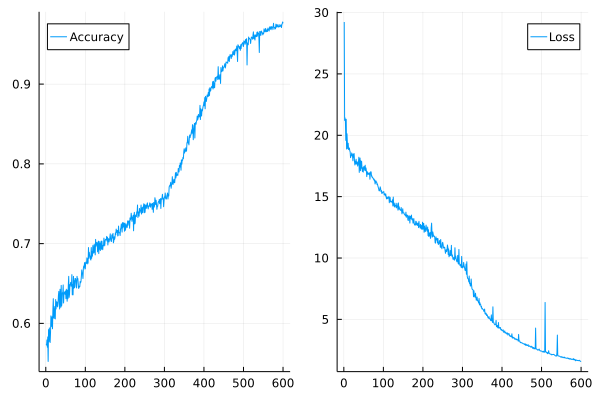

In [11]:
p1 = plot(history["accuracy"],label="Accuracy",legend=:topleft)
p2 = plot(history["loss"],label="Loss")
plot(p1,p2,layout=2)

### Evaluate the model

In [10]:
acc = evaluate(model,metrics,x_test,y_test)
println("accuracy on test data = " * string(acc*100) * "%")

accuracy on test data = 97.5%


### Decision boundary

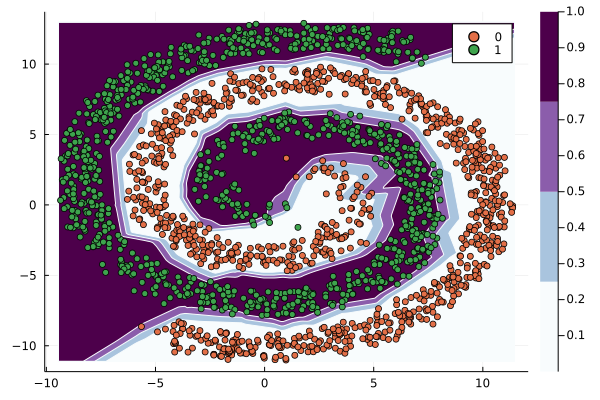

In [12]:
plot_decision_boundary(model,xData,yData)